# 🚀 Your upvote can motivate me to share more useful notebooks!
### Let see I counting on You

<div style="font-family: 'Segoe UI', Arial, sans-serif; padding: 20px; background-color: #f8f9fa; border-radius: 8px; border: 1px solid #e2e6ea; color: #343a40;">
    <h1 style="color: #007bff; font-weight: 700; border-bottom: 2px solid #007bff; padding-bottom: 10px; margin-bottom: 10px;">
        🐱 PyTorch for Cats vs Dogs Classification 🐶
    </h1>
    <h3 style="color: #5a6268; font-weight: 500; margin-top: 0;">
        Develop a robust deep learning model using PyTorch and ResNet18 to classify images of cats and dogs, optimized with transfer learning, data augmentation, and early stopping for improved accuracy.
    </h3>
    <div style="margin-top: 20px; font-size: 14px;">
        <strong>Author:</strong> Daniyal Atta<br>
        <strong>Date:</strong> August 30, 2025<br>
        <strong>Dataset:</strong> Cats and Dogs Dataset (Kaggle)
    </div>
    <hr style="border-top: 1px dashed #ced4da; margin: 25px 0;">
    <div style="font-size: 16px;">
        <h4 style="color: #007bff; margin-top: 0;">Notebook Overview</h4>
        <ol style="padding-left: 0;">
            <li style="margin-bottom: 8px;"><b>Step 1: Import Data</b><br>Load the Cats and Dogs dataset from Kaggle using <code>ImageFolder</code> to organize images into classes (cats and dogs).</li>
            <li style="margin-bottom: 8px;"><b>Step 2: Preprocess</b><br>Apply image resizing (224x224), normalization (ImageNet stats), and data augmentation (random flips, rotations, color jitter). Use <code>DataLoader</code> for batch processing and split data into training and validation sets.</li>
            <li style="margin-bottom: 8px;"><b>Step 3: Build Model</b><br>Implement ResNet18 with transfer learning, freeze early layers, unfreeze the last convolutional block, and replace the fully connected layer with a custom head (256 units, ReLU, dropout, 2 outputs).</li>
            <li style="margin-bottom: 8px;"><b>Step 4: Train Model</b>
                <ul style="font-family: 'Segoe UI', Arial, sans-serif; color: #343a40; font-size: 14px;">
                    <li><strong>Loss & Optimizer:</strong> Use <code>CrossEntropyLoss</code> and <code>Adam</code> optimizer with a learning rate scheduler (<code>ReduceLROnPlateau</code>).</li>
                    <li><strong>Training:</strong> Train for up to 50 epochs with early stopping (patience=10) to prevent overfitting.</li>
                </ul>
            </li>
            <li style="margin-bottom: 8px;"><b>Step 5: Evaluate & Test</b><br>Calculate test set accuracy, visualize training/validation loss and accuracy curves, and test model predictions on sample images.</li>
            <li style="margin-bottom: 0;"><b>Key Takeaways & Enhancements</b><br>Achieve improved accuracy (target >48.49%) through data augmentation, fine-tuning, and early stopping. Suggest further improvements like deeper models (e.g., ResNet50) or advanced augmentation techniques.</li>
        </ol>
    </div>
</div>

Using device: cuda
Train images: 6404
Validation images: 1601
Test images: 2023


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Epoch 1/20, Train Loss: 0.0984, Val Loss: 0.0555, Val Accuracy: 98.19%
Epoch 2/20, Train Loss: 0.0300, Val Loss: 0.0604, Val Accuracy: 98.19%
Epoch 3/20, Train Loss: 0.0193, Val Loss: 0.0781, Val Accuracy: 98.06%
Epoch 4/20, Train Loss: 0.0156, Val Loss: 0.0662, Val Accuracy: 97.75%
Epoch 5/20, Train Loss: 0.0191, Val Loss: 0.0782, Val Accuracy: 96.94%
Epoch 6/20, Train Loss: 0.0075, Val Loss: 0.0743, Val Accuracy: 97.88%
Epoch 7/20, Train Loss: 0.0791, Val Loss: 0.0945, Val Accuracy: 97.56%
Epoch 8/20, Train Loss: 0.0042, Val Loss: 0.0681, Val Accuracy: 97.75%
Epoch 9/20, Train Loss: 0.0024, Val Loss: 0.0716, Val Accuracy: 97.69%
Epoch 10/20, Train Loss: 0.0025, Val Loss: 0.0650, Val Accuracy: 97.81%
Epoch 11/20, Train Loss: 0.0021, Val Loss: 0.0725, Val Accuracy: 97.75%
Early stopping at epoch 11
Test Accuracy: 98.71%


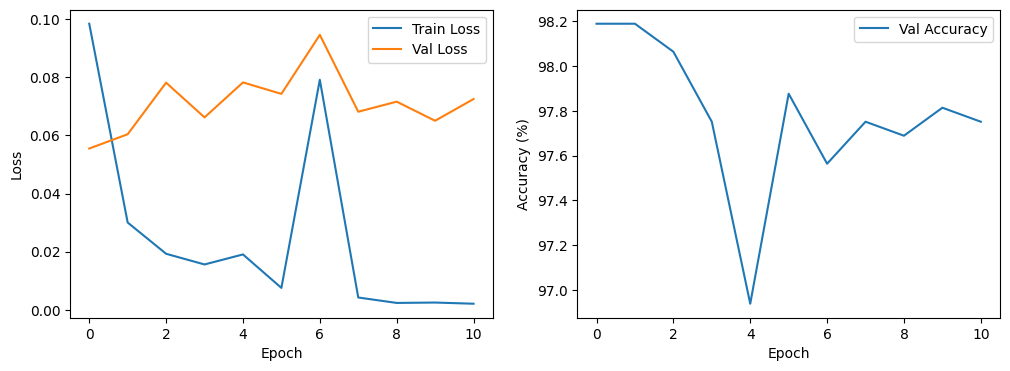

In [1]:
# Important libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data paths
train_dir = "/kaggle/input/cat-and-dog/training_set/training_set"
test_dir = "/kaggle/input/cat-and-dog/test_set/test_set"

# Enhanced transforms with data augmentation for training
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet stats
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load full train dataset
full_train_data = datasets.ImageFolder(train_dir, transform=train_transform)

# Split into train and validation (80/20)
train_size = int(0.8 * len(full_train_data))
val_size = len(full_train_data) - train_size
train_data, val_data = random_split(full_train_data, [train_size, val_size])

# Apply val transform to val_data (no augmentation)
val_data.dataset.transform = val_test_transform

test_data = datasets.ImageFolder(test_dir, transform=val_test_transform)

# DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=4)

print(f"Train images: {len(train_data)}")
print(f"Validation images: {len(val_data)}")
print(f"Test images: {len(test_data)}")

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Unfreeze the last convolutional block for better fine-tuning
for param in model.parameters():
    param.requires_grad = False
for param in model.layer4.parameters():
    param.requires_grad = True

# Replace fc layer for 2 classes
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)
)

model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Early stopping parameters
patience = 10  # Increased patience level
early_stop_counter = 0
best_val_loss = float('inf')
best_model_state = None

# Training loop with validation
num_epochs = 20
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")
    
    # Scheduler step
    scheduler.step(avg_val_loss)
    
    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

# Evaluate on test set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Optional: Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()